In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Helper
import pmdarima as pm
import math
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data_set = Helper.load_data()
data_set = Helper.proc_data(data_set, del_columns = ['DATE'])
data_set.head()

,DFF,USTRADE,CPIAUCSL,CPALTT01USM657N,GFDEBTN,GDP,INDPRO,M2SL,POPTHM,UNRATE
0,4.63,6417.9,31.880000,0.000000,320999.000000,795.734000,33.170900,462.000000,195614.000000,4.000000
1,4.63,6418.2,31.886452,0.020288,320944.533333,795.836744,33.177835,462.083871,195618.709677,3.993548
2,4.63,6418.5,31.892903,0.040576,320890.066667,795.939489,33.184771,462.167742,195623.419355,3.987097
3,4.63,6418.8,31.899355,0.060864,320835.600000,796.042233,33.191706,462.251613,195628.129032,3.980645
4,4.50,6419.1,31.905806,0.081152,320781.133333,796.144978,33.198642,462.335484,195632.838710,3.974194


In [2]:
x_train, x_test, y_train, y_test = Helper.split_data(data_set, 'GDP')

In [ ]:
def perform_RF(x_train, x_test, y_train, y_test):
    model = RandomForestRegressor()

    parameters = {
        'n_estimators' : [100, 200, 300],
        'max_depth' : [None, 10, 30],
        'criterion' : ['squared_error', 'friedman_mse'],
        'min_samples_split' : [2, 10, 20],
        'min_samples_leaf' : [1, 5, 10],
        'max_features' : ['sqrt', 'log2', 0.5]
    }

    Helper.Grid_Search(model, x_train, y_train, x_test, y_test, parameters)

In [8]:
perform_RF(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-26.443 total time=  12.7s
[CV 2/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-86.454 total time=   3.2s
[CV 3/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-35.261 total time=   2.9s
[CV 4/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-34.312 total time=   2.7s
[CV 5/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-65.033 total time=   2.8s
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_s

Trying to improve even more. Checking baseline Performance.

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

fine_tune_model = RandomForestRegressor(criterion= 'friedman_mse',max_depth= None, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300, n_jobs= -1, random_state=42, verbose = 3)
fine_tune_model.fit(x_train, y_train)

y_pred = fine_tune_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE -> {mse}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s


building tree 129 of 300building tree 130 of 300

building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.7s


MSE -> 10.536026164032235


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 224 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.0s finished


Increasing number of estimators.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

fine_tune_model = RandomForestRegressor(criterion= 'friedman_mse',max_depth= None, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000, n_jobs = -1, verbose = 3, random_state=42)
fine_tune_model.fit(x_train, y_train)

y_pred = fine_tune_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE -> {mse}")
print(f"R2 Score -> {r2}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s


building tree 126 of 1000building tree 127 of 1000

building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.8s


building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000
building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    1.6s


building tree 495 of 1000building tree 496 of 1000

building tree 497 of 1000
building tree 498 of 1000
building tree 499 of 1000
building tree 500 of 1000
building tree 501 of 1000
building tree 502 of 1000
building tree 503 of 1000
building tree 504 of 1000
building tree 505 of 1000
building tree 506 of 1000
building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    2.5s


building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tree 830 of 1000
building tree 831 of 1000
building tree 832 of 1000
building tree 833 of 1000
building tree 834 of 1000
building tree 835 of 1000
building tree 836 of 1000
building tree 837 of 1000
building tree 838 of 1000
building tree 839 of 1000
building tree 840 of 1000
building tree 841 of 1000
building tree 842 of 1000
building tree 843 of 1000
building tree 844 of 1000
building tree 845 of 1000
building tree 846 of 1000
building tree 847 of 1000
building tree 848 of 1000
building tree 849 of 1000
building tree 850 of 1000
building tree 851 of 1000
building tree 852 of 1000
building tree 853 of 1000
building tree 854 of 1000
building tree 855 of 1000
building tree 856 of 1000
building tree 857 of 1000
building tree 858 of 1000
building tree 859 of 1000
building tree 860 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 224 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 448 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    0.1s


MSE -> 9.764357526552372
R2 Score -> 0.9999998204145901


[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Now, trying with Cubic Interpolation

In [11]:
data_set = Helper.load_data(dataset='Cubic')
data_set = Helper.proc_data(data_set, del_columns = ['DATE'])

x_train, x_test, y_train, y_test = Helper.split_data(data_set, 'GDP')

perform_RF(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-122.329 total time=   2.1s
[CV 2/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-128.585 total time=   2.1s
[CV 3/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-11.074 total time=   2.1s
[CV 4/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-25.946 total time=   2.1s
[CV 5/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-19.375 total time=   2.2s
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples

In [12]:
fine_tune_model = RandomForestRegressor(criterion= 'squared_error',max_depth= None, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
fine_tune_model.fit(x_train, y_train)

y_pred = fine_tune_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE -> {mse}")

MSE -> 190.77436218689155


ARIMA

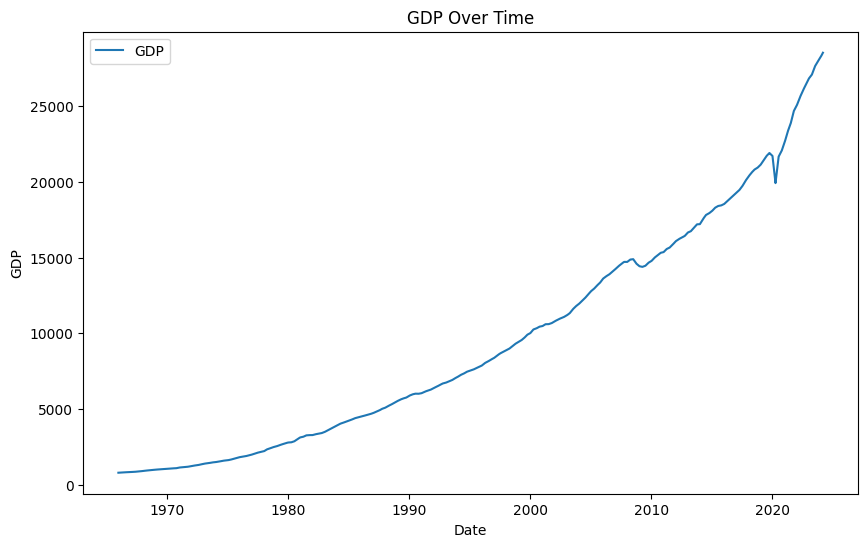

In [17]:
data = pd.read_csv('./Update/Merged/Linear.csv', parse_dates=['DATE'], index_col='DATE') # Indexing by Date and also parsing dates as Date Objects.
data = data.asfreq('D')

plt.figure(figsize=(10, 6))
plt.plot(data['GDP'], label='GDP')
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [10]:
history = []

# Initially, making a small ARIMA model to get the rest of the inferences from.
for i in range(60):
    history.append(data['GDP'].iloc[i])

init_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

train_test_ratio = 0.7 # Train:Test = 70:30
data_len = len(data) - 60 # Rest of data
n_train = math.floor(train_test_ratio * data_len)
n_test = data_len - n_train

In [ ]:
# Training model, by getting ARIMA pred and residual.
arima_predictions = []
residuals = []

for i in range(60, 60 + n_train):
    print("Epoch:", i - 59)
    prediction = init_model.predict(n_periods=1)
    arima_predictions.append(prediction)
    residuals.append(data['GDP'].iloc[i] - prediction)

    history.append(data['GDP'].iloc[i])

    init_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

Epoch: 1


c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 101
Epoch:

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Epoch: 1965
Epoch: 1966
Epoch: 1967
Epoch: 1968
Epoch: 1969
Epoch: 1970
Epoch: 1971
Epoch: 1972
Epoch: 1973
Epoch: 1974
Epoch: 1975
Epoch: 1976
Epoch: 1977
Epoch: 1978
Epoch: 1979
Epoch: 1980
Epoch: 1981
Epoch: 1982
Epoch: 1983
Epoch: 1984
Epoch: 1985
Epoch: 1986
Epoch: 1987
Epoch: 1988
Epoch: 1989
Epoch: 1990
Epoch: 1991
Epoch: 1992
Epoch: 1993
Epoch: 1994
Epoch: 1995
Epoch: 1996
Epoch: 1997
Epoch: 1998
Epoch: 1999
Epoch: 2000
Epoch: 2001
Epoch: 2002
Epoch: 2003
Epoch: 2004
Epoch: 2005
Epoch: 2006
Epoch: 2007
Epoch: 2008
Epoch: 2009
Epoch: 2010
Epoch: 2011
Epoch: 2012
Epoch: 2013
Epoch: 2014
Epoch: 2015
Epoch: 2016
Epoch: 2017
Epoch: 2018
Epoch: 2019
Epoch: 2020
Epoch: 2021
Epoch: 2022
Epoch: 2023
Epoch: 2024
Epoch: 2025
Epoch: 2026
Epoch: 2027
Epoch: 2028
Epoch: 2029
Epoch: 2030
Epoch: 2031
Epoch: 2032
Epoch: 2033
Epoch: 2034
Epoch: 2035
Epoch: 2036
Epoch: 2037
Epoch: 2038
Epoch: 2039
Epoch: 2040
Epoch: 2041
Epoch: 2042
Epoch: 2043
Epoch: 2044
Epoch: 2045
Epoch: 2046
Epoch: 2047
Epoc

In [22]:
with open('auto_arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(init_model, pkl_file)

with open('residuals_arr.pkl', 'wb') as pkl_file:
    pickle.dump(residuals, pkl_file)

In [54]:
with open('auto_arima_model.pkl', 'rb') as pkl_file:
    loaded_model = pickle.load(pkl_file)

print("Loaded auto_arima model summary:")
print(loaded_model.summary())

with open('residuals_arr.pkl', 'rb') as pkl_file:
    residuals = pickle.load(pkl_file)

Loaded auto_arima model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                14889
Model:               SARIMAX(0, 2, 0)   Log Likelihood               23336.843
Date:                Thu, 21 Nov 2024   AIC                         -46671.687
Time:                        03:08:04   BIC                         -46664.078
Sample:                             0   HQIC                        -46669.161
                              - 14889                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0025   1.95e-06   1304.616      0.000       0.003       0.003
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         128568830.41
Prob(Q):      

In [4]:
residual_arr = np.array(residuals)

new_data = data.iloc[60:60+n_train].copy()
new_data['residuals'] = residual_arr

new_data.to_csv('Data_with_residuals.csv', index=False)

NameError: name 'data' is not defined

In [30]:
dataset_arima = pd.read_csv('./Data_with_residuals.csv')
dataset_arima = Helper.proc_data(dataset_arima, del_columns = [])
dataset_arima = dataset_arima.drop(columns=['gdp_diff','GDP'])
dataset_arima.head()

,DFF,USTRADE,CPIAUCSL,CPALTT01USM657N,GFDEBTN,INDPRO,M2SL,POPTHM,UNRATE,residuals
0,4.63,6455.854839,32.183226,0.322518,317731.000000,33.844635,467.267742,195920.612903,3.8,5.287033e-06
1,4.75,6456.409677,32.186452,0.332536,317676.533333,33.846371,467.335484,195926.225806,3.8,8.036967e-07
2,4.75,6456.964516,32.189677,0.342554,317622.066667,33.848106,467.403226,195931.838710,3.8,-2.198962e-07
3,4.75,6457.519355,32.192903,0.352571,317567.600000,33.849842,467.470968,195937.451613,3.8,4.336591e-06
4,4.75,6458.074194,32.196129,0.362589,317513.133333,33.851577,467.538710,195943.064516,3.8,-2.842596e-07


In [ ]:
x_train, y_train = Helper.split_data_arima(dataset_arima, 'residuals')

,DFF,USTRADE,CPIAUCSL,CPALTT01USM657N,GFDEBTN,INDPRO,M2SL,POPTHM,UNRATE
0,4.63,6455.854839,32.183226,0.322518,317731.000000,33.844635,467.267742,195920.612903,3.8
1,4.75,6456.409677,32.186452,0.332536,317676.533333,33.846371,467.335484,195926.225806,3.8
2,4.75,6456.964516,32.189677,0.342554,317622.066667,33.848106,467.403226,195931.838710,3.8
3,4.75,6457.519355,32.192903,0.352571,317567.600000,33.849842,467.470968,195937.451613,3.8
4,4.75,6458.074194,32.196129,0.362589,317513.133333,33.851577,467.538710,195943.064516,3.8


In [34]:
def perform_RF_arima(x_train, y_train):
    model = RandomForestRegressor()

    parameters = {
        'n_estimators' : [100, 200, 300],
        'max_depth' : [None, 10, 30],
        'criterion' : ['squared_error', 'friedman_mse'],
        'min_samples_split' : [2, 10, 20],
        'min_samples_leaf' : [1, 5, 10],
        'max_features' : ['sqrt', 'log2', 0.5]
    }

    Helper.Grid_Search_Arima(model, x_train, y_train, parameters)

perform_RF_arima(x_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.016 total time=   2.6s
[CV 2/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.002 total time=   2.1s
[CV 3/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.004 total time=   2.2s
[CV 4/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.003 total time=   2.1s
[CV 5/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.013 total time=   2.2s
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: -0.0027613464433307185


Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [36]:
ml_model = RandomForestRegressor(criterion='friedman_mse', max_depth = 10, max_features = 'sqrt', min_samples_leaf=10, min_samples_split=2, n_estimators=100)
ml_model.fit(x_train, y_train);

In [37]:
new_data = data.iloc[60+n_train:60+n_train+n_test].copy()
new_data = new_data.drop(columns=['GDP'])
new_data = new_data.reset_index(drop=True)
new_data.head()

,DFF,USTRADE,CPIAUCSL,CPALTT01USM657N,GFDEBTN,INDPRO,M2SL,POPTHM,UNRATE
0,5.22,15345.470968,201.919355,-0.465982,8691274.50,99.117752,7000.093548,299756.451613,4.419355
1,5.22,15346.616129,201.922581,-0.453289,8693116.25,99.116894,7001.225806,299764.193548,4.422581
2,5.22,15347.761290,201.925806,-0.440597,8694958.00,99.116035,7002.358065,299771.935484,4.425806
3,5.28,15348.906452,201.929032,-0.427904,8696799.75,99.115177,7003.490323,299779.677419,4.429032
4,5.25,15350.051613,201.932258,-0.415211,8698641.50,99.114319,7004.622581,299787.419355,4.432258


In [49]:
history = []
mse = 0
for i in range(60 + n_train):
    history.append(data['GDP'].iloc[i])

for i in range(60 + n_train, 60 + n_train + n_test):
    print("Epoch:", i - 59 - n_train)

    arima_prediction = loaded_model.predict(n_periods=1)[0]
    history.append(arima_prediction)
    loaded_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    ml_pred = ml_model.predict(new_data.loc[i-60-n_train, new_data.columns].to_frame().T)
    final_pred = ml_pred + arima_prediction
    mse += (final_pred - data['GDP'].iloc[i])**2

mse = mse / n_test
print("Final MSE ->", mse)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

In [52]:
history = []
mse = 0
for i in range(60 + n_train):
    history.append(data['GDP'].iloc[i])

arima_predictions = loaded_model.predict(n_periods=n_test)

for i in range(60 + n_train, 60 + n_train + n_test):
    print("Epoch:", i - 59 - n_train)

    ml_pred = ml_model.predict(new_data.loc[i-60-n_train, new_data.columns].to_frame().T)
    final_pred = ml_pred + arima_predictions[i -60-n_train]
    mse += (final_pred - data['GDP'].iloc[i])**2

mse = mse / n_test
print("Final MSE ->", mse)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

In [55]:
history = []
mse = 0
for i in range(60 + n_train):
    history.append(data['GDP'].iloc[i])

for i in range(60 + n_train, 60 + n_train + n_test):
    arima_prediction = loaded_model.predict(n_periods=1)[0]
    history.append(arima_prediction)
    loaded_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    ml_pred = ml_model.predict(new_data.loc[i-60-n_train, new_data.columns].to_frame().T)
    final_pred = ml_pred + arima_prediction
    mse += (final_pred - data['GDP'].iloc[i])**2

    print(f"Epoch: {i - 59 - n_train}. Date: {data.index[i].date()}. MSE: {(final_pred - data['GDP'].iloc[i])**2}")

mse = mse / n_test
print("Final MSE ->", mse)

Epoch: 1. Date: 2006-10-07. MSE: [4.85870663e-05]
Epoch: 2. Date: 2006-10-08. MSE: [4.71361199e-05]
Epoch: 3. Date: 2006-10-09. MSE: [4.57071679e-05]
Epoch: 4. Date: 2006-10-10. MSE: [4.32558812e-05]
Epoch: 5. Date: 2006-10-11. MSE: [3.43181778e-05]
Epoch: 6. Date: 2006-10-12. MSE: [3.29068685e-05]
Epoch: 7. Date: 2006-10-13. MSE: [4.13937793e-05]
Epoch: 8. Date: 2006-10-14. MSE: [3.01871345e-05]
Epoch: 9. Date: 2006-10-15. MSE: [3.36858155e-05]
Epoch: 10. Date: 2006-10-16. MSE: [3.21358532e-05]
Epoch: 11. Date: 2006-10-17. MSE: [3.36858154e-05]
Epoch: 12. Date: 2006-10-18. MSE: [2.22708039e-05]
Epoch: 13. Date: 2006-10-19. MSE: [2.93389506e-05]
Epoch: 14. Date: 2006-10-20. MSE: [2.22708038e-05]
Epoch: 15. Date: 2006-10-21. MSE: [2.22708037e-05]
Epoch: 16. Date: 2006-10-22. MSE: [2.22708037e-05]
Epoch: 17. Date: 2006-10-23. MSE: [2.54758372e-05]
Epoch: 18. Date: 2006-10-24. MSE: [2.54758372e-05]
Epoch: 19. Date: 2006-10-25. MSE: [2.80172759e-05]
Epoch: 20. Date: 2006-10-26. MSE: [3.458

Rolling Window of 1000 days

In [56]:
data = pd.read_csv('./Update/Merged/Linear.csv', parse_dates=['DATE'], index_col='DATE') # Indexing by Date and also parsing dates as Date Objects.
data = data.asfreq('D')

history = []

# Initially, making a small ARIMA model to get the rest of the inferences from.
for i in range(1000):
    history.append(data['GDP'].iloc[i])

init_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

train_test_ratio = 0.7 # Train:Test = 70:30
data_len = len(data) - 1000 # Rest of data
n_train = math.floor(train_test_ratio * data_len)
n_test = data_len - n_train

In [57]:
# Training model, by getting ARIMA pred and residual.
arima_predictions = []
residuals = []

for i in range(1000, 1000 + n_train):
    print("Epoch:", i - 999)
    prediction = init_model.predict(n_periods=1)
    arima_predictions.append(prediction)
    residuals.append(data['GDP'].iloc[i] - prediction)

    history.append(data['GDP'].iloc[i])
    del history[0]

    init_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

In [58]:
with open('auto_arima_window_model.pkl', 'wb') as pkl_file:
    pickle.dump(init_model, pkl_file)

with open('residuals_window_arr.pkl', 'wb') as pkl_file:
    pickle.dump(residuals, pkl_file)

In [59]:
with open('auto_arima_window_model.pkl', 'rb') as pkl_file:
    loaded_model = pickle.load(pkl_file)

print("Loaded auto_arima model summary:")
print(loaded_model.summary())

with open('residuals_window_arr.pkl', 'rb') as pkl_file:
    residuals = pickle.load(pkl_file)

Loaded auto_arima model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 2, 0)   Log Likelihood                1253.302
Date:                Thu, 21 Nov 2024   AIC                          -2504.603
Time:                        16:47:06   BIC                          -2499.698
Sample:                             0   HQIC                         -2502.739
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0047   2.08e-05    228.054      0.000       0.005       0.005
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1771829.11
Prob(Q):      

In [60]:
residual_arr = np.array(residuals)

new_data = data.iloc[60:60+n_train].copy()
new_data['residuals'] = residual_arr

new_data.to_csv('Data_with_residuals_window.csv', index=False)

In [62]:
dataset_arima = pd.read_csv('./Data_with_residuals_window.csv')
dataset_arima = Helper.proc_data(dataset_arima, del_columns = [])
dataset_arima = dataset_arima.drop(columns=['GDP'])
dataset_arima.head()

,DFF,USTRADE,CPIAUCSL,CPALTT01USM657N,GFDEBTN,INDPRO,M2SL,POPTHM,UNRATE,residuals
0,4.63,6455.854839,32.183226,0.322518,317731.000000,33.844635,467.267742,195920.612903,3.8,-1.136868e-13
1,4.75,6456.409677,32.186452,0.332536,317676.533333,33.846371,467.335484,195926.225806,3.8,1.136868e-13
2,4.75,6456.964516,32.189677,0.342554,317622.066667,33.848106,467.403226,195931.838710,3.8,-1.136868e-13
3,4.75,6457.519355,32.192903,0.352571,317567.600000,33.849842,467.470968,195937.451613,3.8,1.136868e-13
4,4.75,6458.074194,32.196129,0.362589,317513.133333,33.851577,467.538710,195943.064516,3.8,-1.136868e-13


In [63]:
x_train, y_train = Helper.split_data_arima(dataset_arima, 'residuals')
perform_RF_arima(x_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.014 total time=   2.0s
[CV 2/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.002 total time=   1.9s
[CV 3/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.030 total time=   2.0s
[CV 4/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.003 total time=   2.0s
[CV 5/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.047 total time=   2.1s
[CV 1/5] END criterion=squared_error, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

In [64]:
ml_model = RandomForestRegressor(criterion='squared_error', max_depth = None, max_features = 'log2', min_samples_leaf=10, min_samples_split=2, n_estimators=100)
ml_model.fit(x_train, y_train);

new_data = data.iloc[60+n_train:60+n_train+n_test].copy()
new_data = new_data.drop(columns=['GDP'])
new_data = new_data.reset_index(drop=True)
new_data.head()

,DFF,USTRADE,CPIAUCSL,CPALTT01USM657N,GFDEBTN,INDPRO,M2SL,POPTHM,UNRATE
0,2.23,15115.403226,191.645161,-0.050245,7.749427e+06,95.726306,6421.7,294674.516129,5.345161
1,2.23,15116.038710,191.641935,-0.031642,7.751392e+06,95.737177,6421.9,294681.193548,5.341935
2,2.26,15116.674194,191.638710,-0.013039,7.753357e+06,95.748048,6422.1,294687.870968,5.338710
3,2.24,15117.309677,191.635484,0.005564,7.755322e+06,95.758919,6422.3,294694.548387,5.335484
4,2.25,15117.945161,191.632258,0.024167,7.757287e+06,95.769790,6422.5,294701.225806,5.332258


In [65]:
history = []
mse = 0
for i in range(1000 + n_train):
    history.append(data['GDP'].iloc[i])

for i in range(1000 + n_train, 1000 + n_train + n_test):
    arima_prediction = loaded_model.predict(n_periods=1)[0]
    history.append(arima_prediction)
    del history[0]
    loaded_model = pm.auto_arima(history, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    ml_pred = ml_model.predict(new_data.loc[i-1000-n_train, new_data.columns].to_frame().T)
    final_pred = ml_pred + arima_prediction
    mse += (final_pred - data['GDP'].iloc[i])**2

    print(f"Epoch: {i - 999 - n_train}. MSE: {(final_pred - data['GDP'].iloc[i])**2}. Date: {data.index[i].date()}")

mse = mse / n_test
print("Final MSE ->", mse)

Epoch: 1. MSE: [6.20791549e-05]. Date: 2007-07-16
Epoch: 2. MSE: [4.57418802e-05]. Date: 2007-07-17
Epoch: 3. MSE: [5.48408001e-05]. Date: 2007-07-18
Epoch: 4. MSE: [7.89827075e-05]. Date: 2007-07-19
Epoch: 5. MSE: [7.89827075e-05]. Date: 2007-07-20
Epoch: 6. MSE: [7.89827074e-05]. Date: 2007-07-21
Epoch: 7. MSE: [7.89827075e-05]. Date: 2007-07-22
Epoch: 8. MSE: [6.25025489e-05]. Date: 2007-07-23
Epoch: 9. MSE: [6.2502549e-05]. Date: 2007-07-24
Epoch: 10. MSE: [6.47494063e-05]. Date: 2007-07-25
Epoch: 11. MSE: [6.63507253e-05]. Date: 2007-07-26
Epoch: 12. MSE: [6.88984343e-05]. Date: 2007-07-27
Epoch: 13. MSE: [7.03127558e-05]. Date: 2007-07-28
Epoch: 14. MSE: [8.59256906e-05]. Date: 2007-07-29
Epoch: 15. MSE: [8.59256906e-05]. Date: 2007-07-30
Epoch: 16. MSE: [8.59256906e-05]. Date: 2007-07-31
Epoch: 17. MSE: [0.00010107]. Date: 2007-08-01
Epoch: 18. MSE: [0.00012209]. Date: 2007-08-02
Epoch: 19. MSE: [7.2092037e-05]. Date: 2007-08-03
Epoch: 20. MSE: [6.27353924e-05]. Date: 2007-08-04

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Epoch: 1270. MSE: [1716430.43073385]. Date: 2011-01-05
Epoch: 1271. MSE: [1714729.68766256]. Date: 2011-01-06
Epoch: 1272. MSE: [1713029.78760852]. Date: 2011-01-07
Epoch: 1273. MSE: [1711330.73057173]. Date: 2011-01-08
Epoch: 1274. MSE: [1709632.5165522]. Date: 2011-01-09
Epoch: 1275. MSE: [1707935.14554992]. Date: 2011-01-10
Epoch: 1276. MSE: [1706238.61756489]. Date: 2011-01-11
Epoch: 1277. MSE: [1704543.11530195]. Date: 2011-01-12
Epoch: 1278. MSE: [1702848.06934085]. Date: 2011-01-13
Epoch: 1279. MSE: [1701154.90456867]. Date: 2011-01-14
Epoch: 1280. MSE: [1699461.74824803]. Date: 2011-01-15
Epoch: 1281. MSE: [1697769.43494464]. Date: 2011-01-16
Epoch: 1282. MSE: [1696075.60299397]. Date: 2011-01-17
Epoch: 1283. MSE: [1694385.31958526]. Date: 2011-01-18
Epoch: 1284. MSE: [1692697.42552185]. Date: 2011-01-19
Epoch: 1285. MSE: [1691002.7337429]. Date: 2011-01-20
Epoch: 1286. MSE: [1689314.63846053]. Date: 2011-01-21
Epoch: 1287. MSE: [1687625.62601968]. Date: 2011-01-22
Epoch: 1288.

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Epoch: 2366. MSE: [1579717.14904823]. Date: 2014-01-05
Epoch: 2367. MSE: [1574888.31868871]. Date: 2014-01-06
Epoch: 2368. MSE: [1570069.49727552]. Date: 2014-01-07
Epoch: 2369. MSE: [1565257.05602904]. Date: 2014-01-08
Epoch: 2370. MSE: [1560447.89493897]. Date: 2014-01-09
Epoch: 2371. MSE: [1555638.13733446]. Date: 2014-01-10
Epoch: 2372. MSE: [1550843.78718499]. Date: 2014-01-11
Epoch: 2373. MSE: [1546056.83634046]. Date: 2014-01-12
Epoch: 2374. MSE: [1541273.3937448]. Date: 2014-01-13
Epoch: 2375. MSE: [1536501.24753862]. Date: 2014-01-14
Epoch: 2376. MSE: [1531736.50063739]. Date: 2014-01-15
Epoch: 2377. MSE: [1526979.15304109]. Date: 2014-01-16
Epoch: 2378. MSE: [1522229.7901708]. Date: 2014-01-17
Epoch: 2379. MSE: [1517485.4062532]. Date: 2014-01-18
Epoch: 2380. MSE: [1512750.25852272]. Date: 2014-01-19
Epoch: 2381. MSE: [1508022.51009717]. Date: 2014-01-20
Epoch: 2382. MSE: [1503301.28038996]. Date: 2014-01-21
Epoch: 2383. MSE: [1498588.33195572]. Date: 2014-01-22
Epoch: 2384. 

In [79]:
data = pd.read_csv('short_term_data_pre_covid.csv', parse_dates=['Date'], index_col='Date')

import datetime

last_valid_date = datetime.datetime(2013,12,31,0,0,0)
correction_start_index = 17532  # First integer index location

# Update the indices row by row for integer indices
for i in range(correction_start_index, len(data)):
    last_valid_date += pd.Timedelta(days=1)  # Increment date
    data.index.values[i] = last_valid_date  # Update the index for this row

data.to_csv('ShortTerm_Data_Pre-Covid.csv')